<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [11]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [12]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [13]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


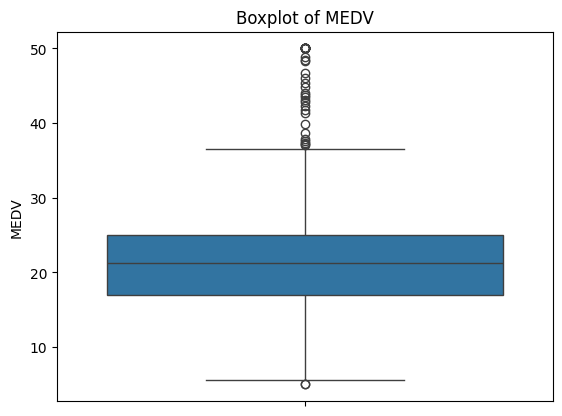

In [14]:
# Create and display a boxplot for the MEDV column
sns.boxplot(y=boston_df["MEDV"])
plt.title("Boxplot of MEDV")
plt.ylabel("MEDV")
plt.show()

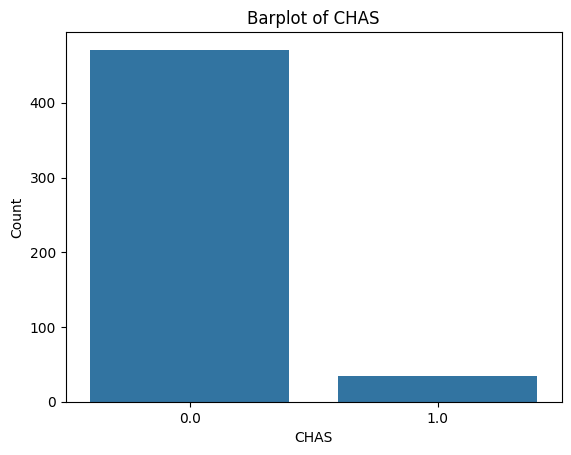

In [15]:
# Create and display a barplot for the CHAS column
sns.countplot(x=boston_df["CHAS"])
plt.title("Barplot of CHAS")
plt.xlabel("CHAS")
plt.ylabel("Count")
plt.show()

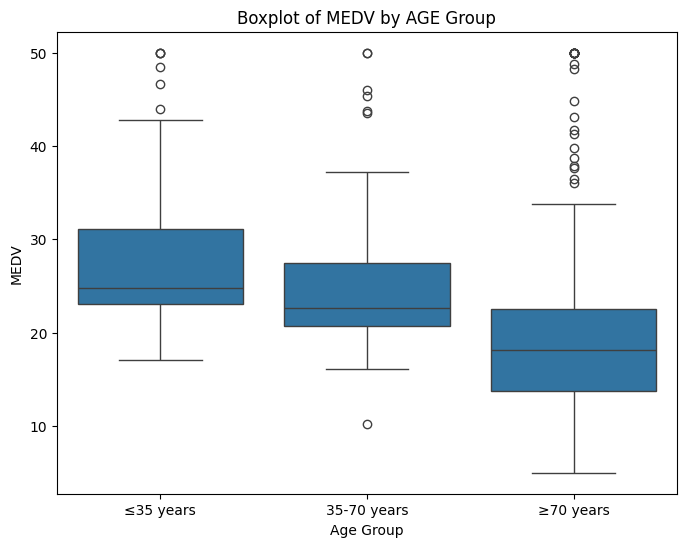

In [16]:
# Discretize the AGE column into three categories
bins = [0, 35, 70, float('inf')]  # Define bin edges
labels = ["≤35 years", "35-70 years", "≥70 years"]  # Define labels for groups
boston_df["AGE_group"] = pd.cut(boston_df["AGE"], bins=bins, labels=labels, right=True)

# Create and display a boxplot for MEDV vs AGE_group
plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df["AGE_group"], y=boston_df["MEDV"])
plt.title("Boxplot of MEDV by AGE Group")
plt.xlabel("Age Group")
plt.ylabel("MEDV")
plt.show()


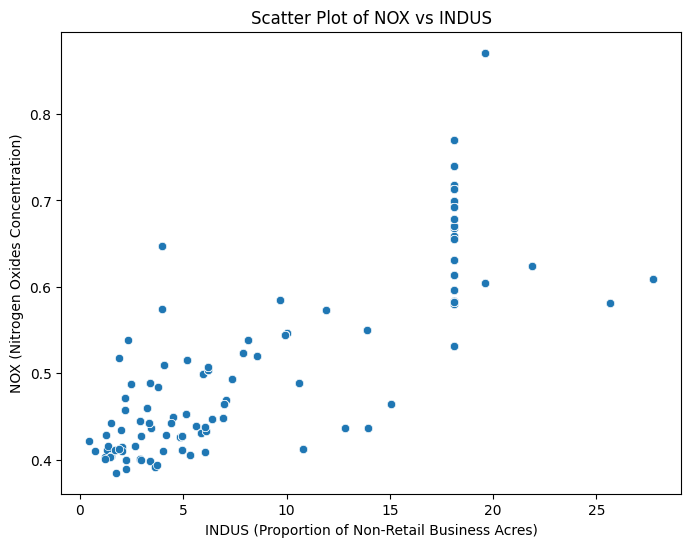

In [17]:
# Create and display a scatter plot for NOX vs INDUS
plt.figure(figsize=(8, 6))
sns.scatterplot(x=boston_df["INDUS"], y=boston_df["NOX"])
plt.title("Scatter Plot of NOX vs INDUS")
plt.xlabel("INDUS (Proportion of Non-Retail Business Acres)")
plt.ylabel("NOX (Nitrogen Oxides Concentration)")
plt.show()

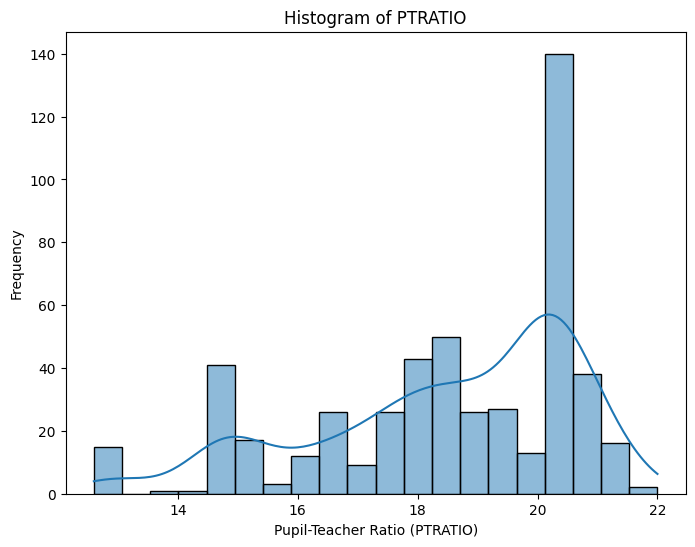

In [18]:
# Create and display a histogram for the PTRATIO column
plt.figure(figsize=(8, 6))
sns.histplot(boston_df["PTRATIO"], bins=20, kde=True)
plt.title("Histogram of PTRATIO")
plt.xlabel("Pupil-Teacher Ratio (PTRATIO)")
plt.ylabel("Frequency")
plt.show()


In [19]:
from scipy.stats import ttest_ind

# Split MEDV into two groups based on CHAS value
medv_chas_0 = boston_df[boston_df["CHAS"] == 0]["MEDV"]
medv_chas_1 = boston_df[boston_df["CHAS"] == 1]["MEDV"]

# Perform an independent t-test
t_stat, p_value = ttest_ind(medv_chas_0, medv_chas_1, equal_var=False)  # Welch’s t-test

# Print results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference between MEDV for CHAS = 0 and CHAS = 1.")
else:
    print("There is no statistically significant difference between MEDV for CHAS = 0 and CHAS = 1.")


T-statistic: -3.1133
P-value: 0.0036
There is a statistically significant difference between MEDV for CHAS = 0 and CHAS = 1.


In [20]:
from scipy.stats import f_oneway

# Group MEDV values by unique AGE values
age_groups = [boston_df[boston_df["AGE"] == age]["MEDV"] for age in boston_df["AGE"].unique()]

# Perform ANOVA test
f_stat, p_value = f_oneway(*age_groups)

# Print results
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in MEDV for different AGE values.")
else:
    print("There is no statistically significant difference in MEDV for different AGE values.")


F-statistic: 0.9840
P-value: 0.5540
There is no statistically significant difference in MEDV for different AGE values.


In [21]:
from scipy.stats import pearsonr

# Compute Pearson correlation coefficient and p-value
corr_coef, p_value = pearsonr(boston_df["NOX"], boston_df["INDUS"])

# Print results
print(f"Pearson Correlation Coefficient: {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant relationship between NOX and INDUS.")
else:
    print("There is no statistically significant relationship between NOX and INDUS.")


Pearson Correlation Coefficient: 0.7637
P-value: 0.0000
There is a statistically significant relationship between NOX and INDUS.


In [22]:
import statsmodels.api as sm

# Define independent (X) and dependent (y) variables
X = boston_df["DIS"]  # Independent variable
y = boston_df["MEDV"]  # Dependent variable

# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 17 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        13:47:01   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0